In [1]:
import pandas as pd
df = pd.read_csv("../data/eda_b4s_clean.csv")
#head der bereinigten Daten anzeigen
df.head(5)  # Ausgabe der ersten Zeilen des bereinigten Data

,time,1-1:1290*255,1-1:2290*255,1-1:5290*255,1-1:6290*255,1-1:7290*255,1-1:8290*255,Nettolast_P_kW,Nettolast_Q_kvar,Holiday,dkl010h0,fkl010h0,fkl010h1,gre000h0,rre150h0,tre200h0,hour,weekday,is_weekend
0,2020-03-07 23:15:00,65888,0,4468,0,0,17112,65.888,-12.644,0,0.0,0.275,1.8,0.0,0.0,0.800,23,5,1
1,2020-03-07 23:30:00,67096,0,4456,0,0,16428,67.096,-11.972,0,0.0,0.300,1.8,0.0,0.0,0.800,23,5,1
2,2020-03-07 23:45:00,56656,0,4716,0,0,16652,56.656,-11.936,0,194.0,0.350,1.8,0.0,0.0,0.725,23,5,1
3,2020-03-08 00:00:00,55444,0,4884,0,0,16100,55.444,-11.216,0,194.0,0.400,1.8,0.0,0.0,0.650,0,6,1
4,2020-03-08 00:15:00,58740,0,4960,0,0,16208,58.740,-11.248,0,194.0,0.450,1.7,0.0,0.0,0.575,0,6,1


MAE: 12.09 kW
RMSE: 14.85 kW
R²: 0.46
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimato

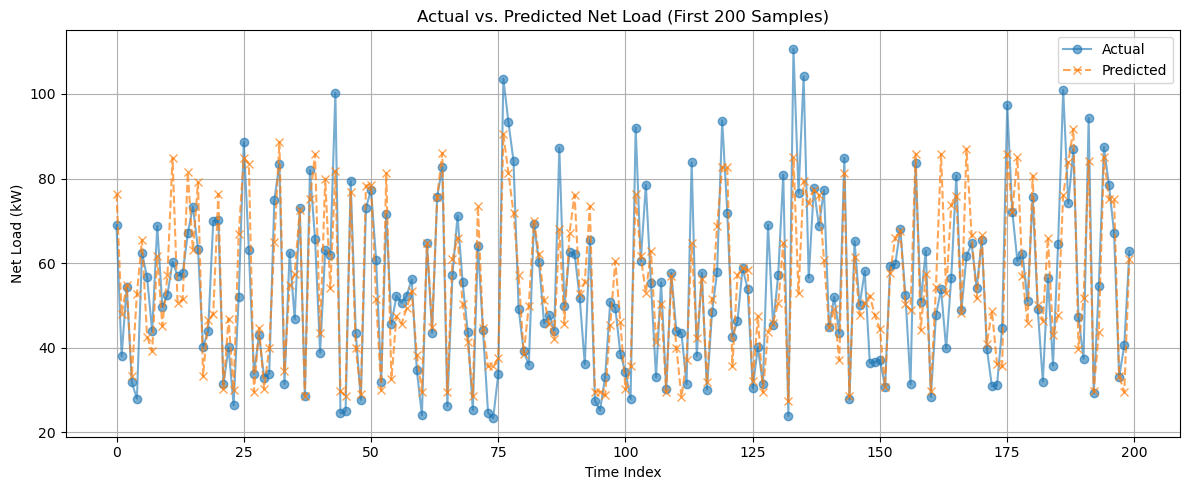

['../data/random_forest_model.pkl']

In [3]:
# Der folgende Code führt eine Datenanalyse und ein maschinelles Lernmodelltraining durch, um die Nettolast (kW) basierend auf verschiedenen Einflussfaktoren wie globaler Strahlung, Stunde des Tages, Wochentag, Wochenende und Feiertagen vorherzusagen.
# Zunächst werden die Daten aus einer CSV-Datei geladen und bereinigt. Anschließend wird eine Korrelationsanalyse durchgeführt, um die Beziehungen zwischen den Variablen zu untersuchen.
# Danach werden die Daten in Trainings- und Testdatensätze aufgeteilt. Ein lineares Regressionsmodell wird initialisiert und trainiert, gefolgt von der Implementierung eines Random Forest Regressors mit Hyperparameteroptimierung mittels GridSearchCV.
# Die besten Parameter werden extrahiert und die Vorhersagen auf den Testdaten durchgeführt. Schließlich werden Metriken wie der Mean Squared Error (MSE) und der R²-Score berechnet, um die Modellleistung zu bewerten.
# Die Ergebnisse der Hyperparameteroptimierung werden in einem DataFrame zusammengefasst und die besten Ergebnisse werden angezeigt. Zudem wird eine Visualisierung der tatsächlichen und vorhergesagten Nettolast erstellt.
# Abschließend wird das trainierte Random Forest Modell gespeichert, um es später wiederverwenden zu können.



# Features und Ziel definieren
features = [
    'Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday'
]
target = 'Net Load (kW)'

# Eingabedaten vorbereiten
X = df.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})[features]

y = df['Nettolast_P_kW']

from sklearn.model_selection import train_test_split

# Split in Trainings- und Testdaten (z. B. 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression

# Modell initialisieren und trainieren
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Vorhersage auf Testdaten
y_pred = lr_model.predict(X_test)

# Bewertung
mae = mean_absolute_error(y_test, y_pred)  
rmse = np.sqrt(mean_squared_error(y_test, y_pred))                  # Mittlerer absoluter Fehler
    # Wurzel des mittleren quadratischen Fehlers
r2 = r2_score(y_test, y_pred)                                # Bestimmtheitsmaß

# Ausgabe
print(f"MAE: {mae:.2f} kW")
print(f"RMSE: {rmse:.2f} kW")
print(f"R²: {r2:.2f}")










from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Modell initialisieren
rf = RandomForestRegressor(random_state=42)

# Hyperparameter definieren
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV zur Hyperparameteroptimierung
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Modell trainieren
grid_search.fit(X_train, y_train)

# Bestes Modell extrahieren
best_rf_model = grid_search.best_estimator_
# Vorhersagen auf den Testdaten
y_pred = best_rf_model.predict(X_test)   

print("Beste Parameterkombination:")
print(grid_search.best_params_)


results_df = pd.DataFrame(grid_search.cv_results_)
# Wähle nur relevante Spalten aus
results_df = results_df[[
    'mean_test_score', 'std_test_score', 'params'
]]

# Bessere Übersicht: Sortieren nach Score (höherer negativer MSE = schlechter)
results_df['positive_mse'] = -results_df['mean_test_score']
results_df = results_df.sort_values('positive_mse')

# Ausgabe der Ergebnisse
print("Ergebnisse der Hyperparameteroptimierung:")
print(results_df.head(10))  # Zeige die besten 10 Ergebnisse an 


best_rf_model = grid_search.best_estimator_
# Vorhersagen auf den Testdaten
y_pred = best_rf_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score    
# MSE und R² berechnen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}") 


from sklearn.metrics import r2_score

# Vorhersage auf Testdaten
y_pred = best_rf_model.predict(X_test)

# R² berechnen
r2 = r2_score(y_test, y_pred)
print("R²-Score auf Testdaten:", r2)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", marker='o', linestyle='-', alpha=0.6)
plt.plot(y_pred[:200], label="Predicted", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("Net Load (kW)")
plt.title("Actual vs. Predicted Net Load (First 200 Samples)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import joblib

# Speichern
joblib.dump(best_rf_model, "../data/random_forest_model.pkl")

# Laden (bei Bedarf)
# model = joblib.load("random_forest_model.pkl")


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
results = []


# Features und Ziel definieren
features = [
    'Global Radiation', 'Hour of Day', 'Weekday', 'Weekend', 'Holiday'
]
target = 'Net Load (kW)'

# Eingabedaten vorbereiten
X = df.rename(columns={
    'Nettolast_P_kW': 'Net Load (kW)',
    'gre000h0': 'Global Radiation',
    'hour': 'Hour of Day',
    'weekday': 'Weekday',
    'is_weekend': 'Weekend'
})[features]

y = df['Nettolast_P_kW']

from sklearn.model_selection import train_test_split

# Split in Trainings- und Testdaten (z. B. 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
#Random Forest (mit GridSearchCV)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

results.append({
    "Modell": "Random Forest (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_rf),
    "R²": r2_score(y_test, y_pred_rf)
})


In [ ]:
#Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

gbr_grid = GridSearchCV(gbr, gbr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
best_gbr = gbr_grid.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)

results.append({
    "Modell": "Gradient Boosting (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_gbr),
    "R²": r2_score(y_test, y_pred_gbr)
})


In [11]:
#XGBoost
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

results.append({
    "Modell": "XGBoost (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_xgb),
    "R²": r2_score(y_test, y_pred_xgb)
})


In [12]:
# LightGBM
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_
y_pred_lgbm = best_lgbm.predict(X_test)

results.append({
    "Modell": "LightGBM (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_lgbm),
    "R²": r2_score(y_test, y_pred_lgbm)
})


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 290
[LightGBM] [Info] Number of data points in the train set: 11192, number of used features: 5
[LightGBM] [Info] Start training from score 55.175607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000967 seconds.
You can set `force_col_wis

In [14]:
# KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn_params = {
    'n_neighbors': [3, 5, 7, 9]
}

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

results.append({
    "Modell": "KNN (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_knn),
    "R²": r2_score(y_test, y_pred_knn)
})


In [15]:
#SVR (Support Vector Regression)
from sklearn.svm import SVR

svr = SVR()
svr_params = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['rbf']
}

svr_grid = GridSearchCV(svr, svr_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
svr_grid.fit(X_train, y_train)
best_svr = svr_grid.best_estimator_
y_pred_svr = best_svr.predict(X_test)

results.append({
    "Modell": "SVR (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_svr),
    "R²": r2_score(y_test, y_pred_svr)
})


/opt/anaconda3/envs/EDA/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [16]:
#Ridge & Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge_params = {'alpha': [0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)
results.append({
    "Modell": "Ridge Regression (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_ridge),
    "R²": r2_score(y_test, y_pred_ridge)
})

# Lasso
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1.0]}
lasso_grid = GridSearchCV(Lasso(max_iter=10000), lasso_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)
results.append({
    "Modell": "Lasso Regression (Tuned)",
    "MSE": mean_squared_error(y_test, y_pred_lasso),
    "R²": r2_score(y_test, y_pred_lasso)
})


In [17]:
import pandas as pd

results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
print("🔍 Modellvergleich (Tuned):")
print(results_df)


🔍 Modellvergleich (Tuned):
                      Modell         MSE        R²
2            XGBoost (Tuned)   81.635382  0.801149
1  Gradient Boosting (Tuned)   81.957831  0.800364
3           LightGBM (Tuned)   81.967927  0.800339
0      Random Forest (Tuned)   83.696020  0.796130
5                KNN (Tuned)  102.520732  0.750276
6                SVR (Tuned)  203.580247  0.504112
4   Ridge Regression (Tuned)  220.444144  0.463034
7   Ridge Regression (Tuned)  220.444144  0.463034
8   Lasso Regression (Tuned)  220.445116  0.463032


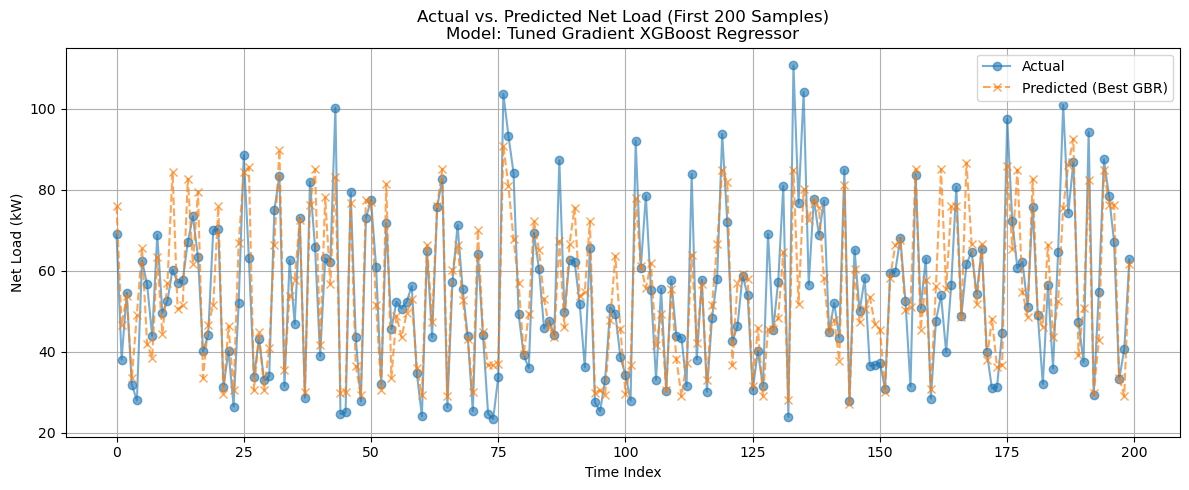

Mean Squared Error (MSE): 81.64
R²-Score: 0.8011


In [21]:
# Vorhersageplot mit dem besten Modell (Gradient Boosting Regressor)
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Vorhersageplot mit bestem Modell (RandomizedSearchCV)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:200], label="Actual", marker='o', linestyle='-', alpha=0.6)
plt.plot(y_pred_xgb[:200], label="Predicted (Best GBR)", marker='x', linestyle='--', alpha=0.7)
plt.xlabel("Time Index")
plt.ylabel("Net Load (kW)")
plt.title("Actual vs. Predicted Net Load (First 200 Samples)\nModel: Tuned Gradient XGBoost Regressor")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Metriken ausgeben
mse_rand = mean_squared_error(y_test, y_pred_xgb)
r2_rand = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (MSE): {mse_rand:.2f}")
print(f"R²-Score: {r2_rand:.4f}")


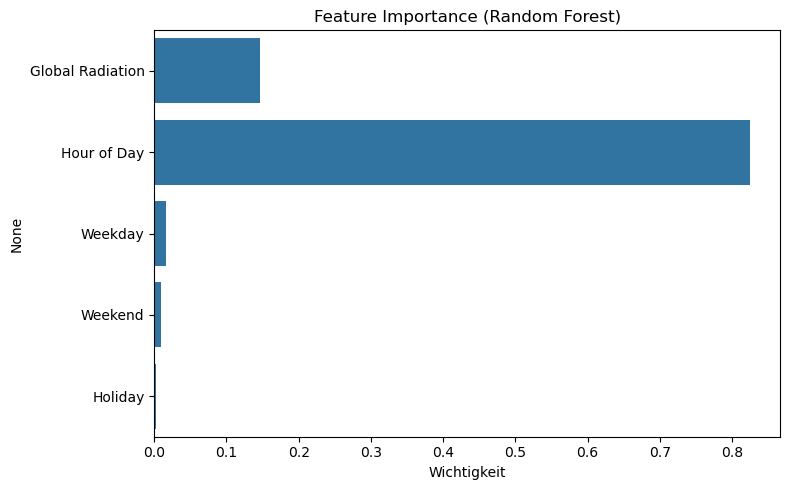

In [22]:
# Visualisierung der Feature-Wichtigkeit
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf_model.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Wichtigkeit")
plt.tight_layout()
plt.show()
